In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [3]:
%time
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

sys.path.append('..')
import project

CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 3.34 μs


In [4]:
data_root = '../data/Emory-4DCT'
test_index = 0
mask_roi = 'lung_combined_mask'
mesh_radius = 20
num_levels = 3
conv_channels = 4
conv_kernel_size = 3
num_conv_layers = 2
batch_size = 4
learning_rate = 1e-5

In [5]:
emory4dct = project.imaging.Emory4DCT(data_root)
emory4dct

Emory4DCT('../data/Emory-4DCT', 10 cases)

In [6]:
train_examples = emory4dct.get_examples(mask_roi, mesh_radius)
test_example = train_examples.pop(test_index)
test_example

(PosixPath('../data/Emory-4DCT/Case1Pack/NIFTI/case1_T00.nii.gz'),
 PosixPath('../data/Emory-4DCT/Case1Pack/CorrField/case1_T10_T00.nii.gz'),
 PosixPath('../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T00/lung_combined_mask.nii.gz'),
 PosixPath('../data/Emory-4DCT/Case1Pack/pygalmesh/case1_T00_20.xdmf'),
 20)

In [7]:
train_data = project.data.Dataset(train_examples)
test_data = project.data.Dataset([test_example])

In [84]:
model = project.model.UNet3D(
    in_channels=1,
    out_channels=1,
    num_levels=num_levels,
    num_conv_layers=num_conv_layers,
    conv_channels=conv_channels,
    conv_kernel_size=conv_kernel_size,
).cuda()

In [141]:
%autoreload
trainer = project.training.Trainer(
    model, train_data, test_data, batch_size, learning_rate
)

Running test phase
['case1_T00.nii'].{'x': 'epoch', 'y': 'value', 'row': 'rep', 'col': 'metric', 'hue': 'phase'}
{'phase': ['train', 'test'], 'rep': ['dofs', 'image'], 'metric': ['loss', 'u_pred_norm', 'u_true_norm', 'mu_pred_norm', 'mu_anat_corr']}


<IPython.core.display.Javascript object>


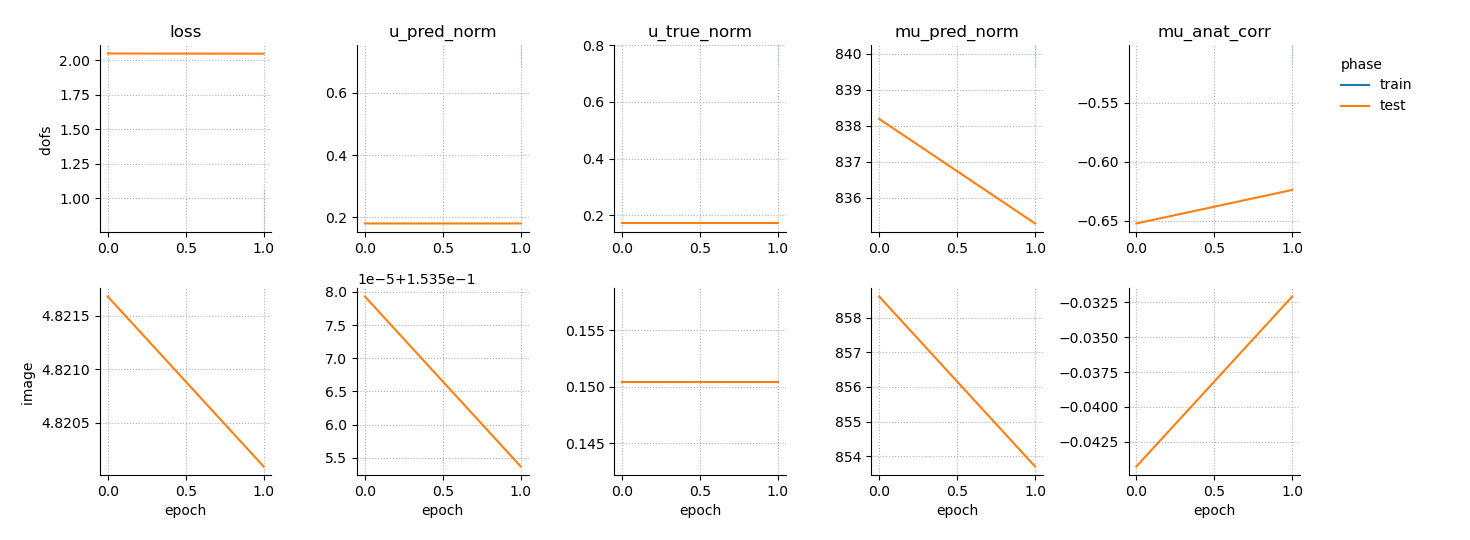

<IPython.core.display.Javascript object>


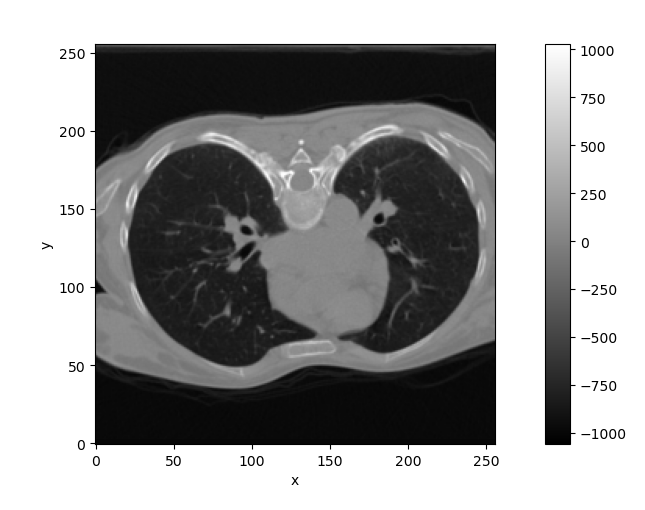

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

<IPython.core.display.Javascript object>


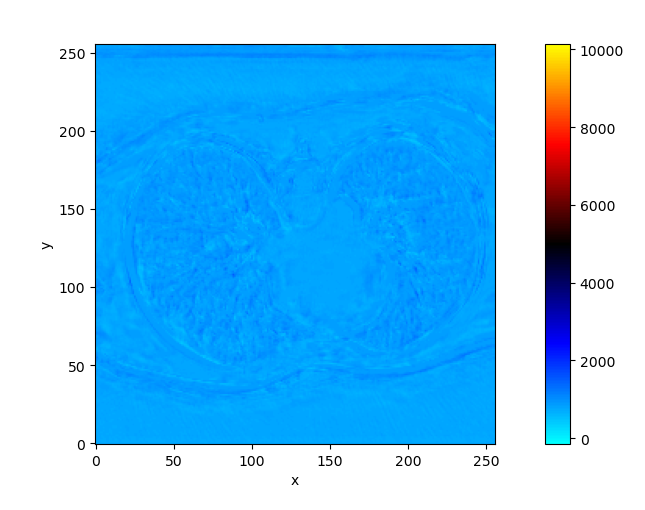

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

<IPython.core.display.Javascript object>


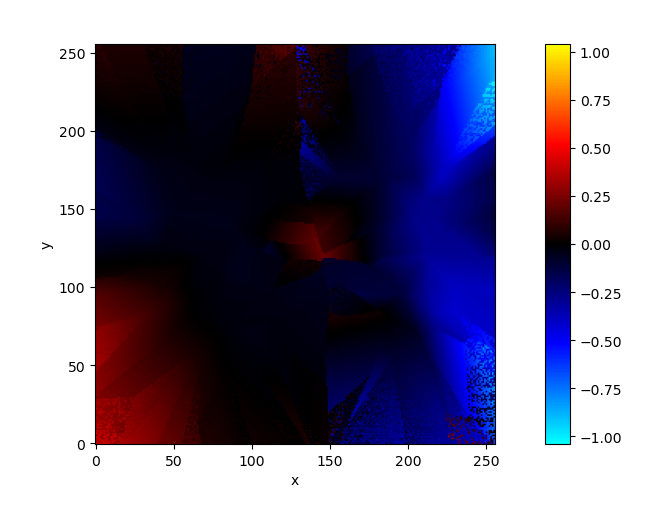

interactive(children=(SelectionSlider(description='c', options=((0, 0), (1, 1), (2, 2)), value=0), SelectionSl…

<IPython.core.display.Javascript object>


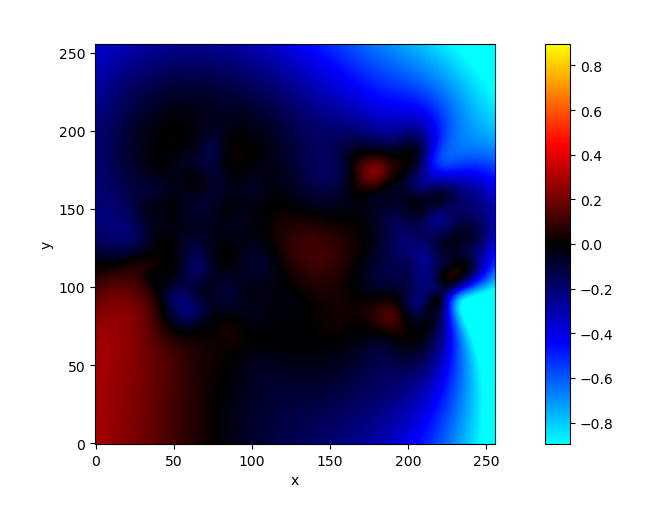

interactive(children=(SelectionSlider(description='c', options=((0, 0), (1, 1), (2, 2)), value=0), SelectionSl…

2.0497


In [142]:
# test forward pass and initialize viewers
trainer.run_epoch(phase='test', epoch=0)

In [144]:
trainer.train(num_epochs=250)

Training...
Epoch 1/250
Running train phase
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T00.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T10_T00.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T00/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/pygalmesh/case2_T00_20.xdmf... 682
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T60.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case1Pack/CorrField/case1_T70_T60.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T60/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case1Pack/pygalmesh/case1_T60_20.xdmf... 314
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T30.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case1Pack/CorrField/case1_T40_T30.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T30/lung_combined_mask.nii.gz... (256, 256, 94)

Loading ../data/Emory-4DCT/Case5Pack/pygalmesh/case5_T00_20.xdmf... 464
['case9_T90.nii', 'case5_T80.nii', 'case3_T70.nii', 'case5_T00.nii']....0.2924
Loading ../data/Emory-4DCT/Case6Pack/NIFTI/case6_T90.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/CorrField/case6_T00_T90.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case6Pack/TotalSegment/case6_T90/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/pygalmesh/case6_T90_20.xdmf... 404
Loading ../data/Emory-4DCT/Case4Pack/NIFTI/case4_T40.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/CorrField/case4_T50_T40.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T40/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/pygalmesh/case4_T40_20.xdmf... 376
Loading ../data/Emory-4DCT/Case9Pack/NIFTI/case9_T10.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case9Pack/CorrField/case9_T20_T10.nii.gz... (256, 256, 94,

['case8_T30.nii', 'case3_T10.nii', 'case10_T40.nii', 'case8_T20.nii']....1.1891
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T10.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case1Pack/CorrField/case1_T20_T10.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T10/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case1Pack/pygalmesh/case1_T10_20.xdmf... 328
Loading ../data/Emory-4DCT/Case10Pack/NIFTI/case10_T60.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/CorrField/case10_T70_T60.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case10Pack/TotalSegment/case10_T60/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/pygalmesh/case10_T60_20.xdmf... 378
Loading ../data/Emory-4DCT/Case3Pack/NIFTI/case3_T90.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pack/CorrField/case3_T00_T90.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T90

Loading ../data/Emory-4DCT/Case9Pack/CorrField/case9_T30_T20.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case9Pack/TotalSegment/case9_T20/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case9Pack/pygalmesh/case9_T20_20.xdmf... 267
Loading ../data/Emory-4DCT/Case5Pack/NIFTI/case5_T10.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case5Pack/CorrField/case5_T20_T10.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case5Pack/TotalSegment/case5_T10/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case5Pack/pygalmesh/case5_T10_20.xdmf... 436
Loading ../data/Emory-4DCT/Case9Pack/NIFTI/case9_T70.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case9Pack/CorrField/case9_T80_T70.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case9Pack/TotalSegment/case9_T70/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case9Pack/pygalmesh/case9_T70_20.xdmf... 148
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_

Loading ../data/Emory-4DCT/Case6Pack/NIFTI/case6_T00.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/CorrField/case6_T10_T00.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case6Pack/TotalSegment/case6_T00/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/pygalmesh/case6_T00_20.xdmf... 414
Loading ../data/Emory-4DCT/Case8Deploy/NIFTI/case8_T50.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/CorrField/case8_T60_T50.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case8Deploy/TotalSegment/case8_T50/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/pygalmesh/case8_T50_20.xdmf... 629
['case10_T20.nii', 'case6_T00.nii', 'case8_T50.nii']...0.7177
Running test phase
['case1_T00.nii'].

AttributeError: 'XArrayViewer' object has no attribute 'preprocess_array'

In [143]:
trainer.evaluator.metrics

loss u_pred_norm u_true_norm  \
epoch batch example       phase rep                                       
0     1     case1_T00.nii test  dofs   2.049715    0.180725    0.171389   
                                image  4.821677    0.153579    0.150447   

                                      mu_pred_norm mu_anat_corr  
epoch batch example       phase rep                              
0     1     case1_T00.nii test  dofs    838.188008    -0.652383  
                                image   858.615845    -0.044265